In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Can we predict the final grade of students based on score from 1st quiz

x = score from exam1  
y = final grade

In [2]:
# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], [80, 85], [76, 80], [70, 68], [79, 75]]), columns = ['x', 'y'])

x = df['x'] # first exam grade
y = df['y'] # final grade

df.head()

,x,y
0,100,96
1,93,90
2,84,89
3,80,85
4,76,80


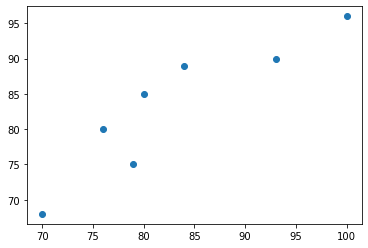

In [3]:
# look at scatter of x vs y
    # what is the relationship between x and y
plt.scatter(df.x, df.y)

Linear Regression:  
     - Does a set of independent variables do a good job in predicting an outcome (dependent) variable  
     - Is the model good enough compared to a baseline?  
     - Is the model with features/ind variable valuable/significant compared to a model with no features?  

### Theoretical description of a regression 'model':
The give pairs ($x_i$, $y_i$) are related by:  
    - for every x and y there is a relationship

 <span style="color:red">$y_i$ = $\beta_0$ + $\beta_1 x_i$ +  $\epsilon_i$  (i = 1,2,3,...n)</span>


$\beta_0$ , $\beta_1$ are constants  

$\epsilon_i$ is error term drawn from Normal distribution with mean 0 and constant variance

*This is saying, "Your final grade you can use a linear equation to predict using your first exam score"*]

even if you try to keep everything the same everything betwenen 2 students you will still most likely get different final scores between them.

### Estimating/learning regression coefficients (using OLS):   
Estimate values of coefficients and intercept in the equation above


 <span style="color:blue">$\hat{y_i}$ = $b_0$ + $b_1$ $x_i$     (i = 1,2,3,...n)</span>

$b_0$ and $b_1$ are estimates for $\beta_0$ and $\beta_1$

residuals: $e$ = $y_i - \hat{y}$


The regression models we will create **estimates** values of $b_0$ and $b_1$

What we are doing is trying to estimate thes cooeficients ($b_0$ + $b_1$) if they match you should end up with some sort of residual.

### Create a baseline prediction.
- Make a prediction just based on dependent variable i.e. model with no independent variable
    - mean or median of dependent variable (we will use mean for this lesson)

In [4]:
df.head()
#suppose there is no x and only y
    # how do we make a prediction
        # just take the mean of the target variable

,x,y
0,100,96
1,93,90
2,84,89
3,80,85
4,76,80


In [5]:
#baseline is mean of dependent variable
df['baseline'] = df.y.mean()
df.head()

,x,y,baseline
0,100,96,83.285714
1,93,90,83.285714
2,84,89,83.285714
3,80,85,83.285714
4,76,80,83.285714


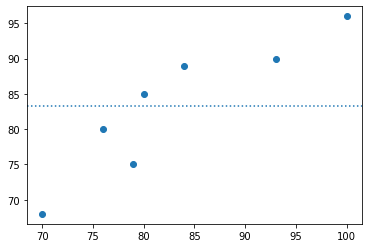

In [6]:
# plot data with baseline:
plt.scatter(df.x, df.y)
plt.axhline(df.y.mean(), ls = ':')

In [7]:
# Now we fit a regression model using OLS method.

from statsmodels.formula.api import ols
    # statsmodel has the OLS
        # OLS = oridinary least square

# generate parameters, i.e. create model
ols_model = ols('y ~ x', data=df).fit()
    #finding the model

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(x)

df

# will learn in the modeling lesson

,x,y,baseline,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350
3,80,85,83.285714,80.610384
4,76,80,83.285714,77.205418
5,70,68,83.285714,72.097968
6,79,75,83.285714,79.759142


Text(0.5, 1.0, 'Baseline and OLS regression model')

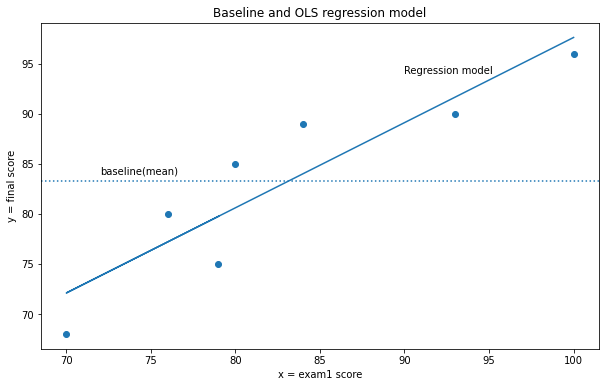

In [8]:
#create a plot with both OLS regression line and baseline.

fig = plt.figure(figsize = (10,6))
plt.scatter(df.x, df.y)
plt.axhline(y = y.mean(), ls = ':')
plt.plot(df.x, df.yhat)
plt.text(72,84, 'baseline(mean)')
plt.text(90,94, 'Regression model')
plt.xlabel('x = exam1 score')
plt.ylabel('y = final score')
plt.title('Baseline and OLS regression model')

# OG scatter plus basleine
    # and then adds line of best fit
    

## Regression Metrics: Measure of dispersion/distance of datapoints around the fitted line

### Regression Metrics :

- Compare to baseline
- Compare different models with different independent variables

### Vocabulary 
- Residual 
    - error (predicted minus actual)
- SSE 
    - sum of squared error
- MSE 
    - mean squared error
- RMSE 
    - root mean squared error
- Mean Absolute error
    - take absolute error and then take the mean of it

### Residuals (error)

- predicted minus actual

In [9]:
# try to calculat eon our own in python
    # take predictive value
df['residual'] = df.y - df.yhat
df['baseline_residual'] = df.y - df.baseline

In [10]:
df

,x,y,baseline,yhat,residual,baseline_residual
0,100,96,83.285714,97.635214,-1.635214,12.714286
1,93,90,83.285714,91.676524,-1.676524,6.714286
2,84,89,83.285714,84.015350,4.984650,5.714286
3,80,85,83.285714,80.610384,4.389616,1.714286
4,76,80,83.285714,77.205418,2.794582,-3.285714
5,70,68,83.285714,72.097968,-4.097968,-15.285714
6,79,75,83.285714,79.759142,-4.759142,-8.285714


In [11]:
# Do we prefer higher residuals or lower residuals

# What if sum of residuals for these models?

### Residuals for Baseline model
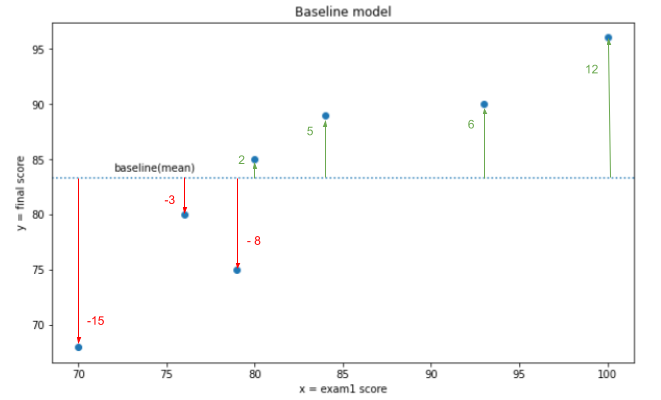

### Residuals for OLS model
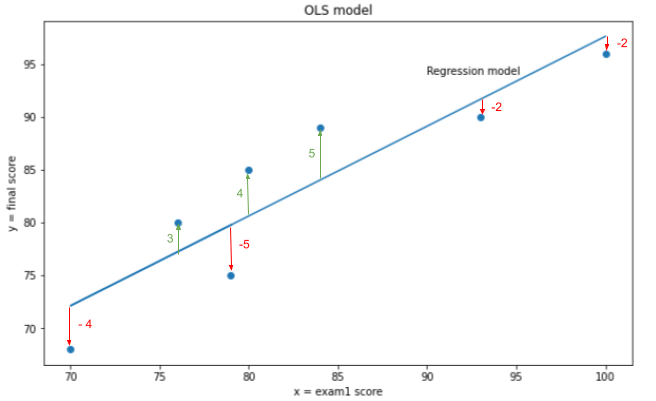

In [12]:
df.residual.sum()

-1.4210854715202004e-14

In [13]:
df.baseline_residual.sum()

-4.263256414560601e-14

##### Sum of residual is zero for both model above so 'residuals' are not helpful in finding the line of best fit
 - This is true for any line passing through the centeroid 

### Residual Plots:
- Independent variable vs residual values
- dependent variable vs residual values

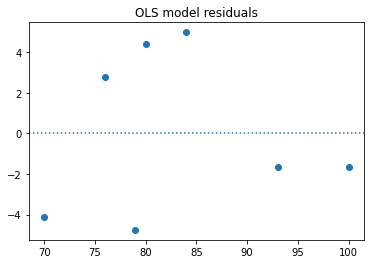

In [14]:
# plotting residual value itself 
    # the independednt variable (x)
    # the residual (y)

plt.scatter(df.x, df.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

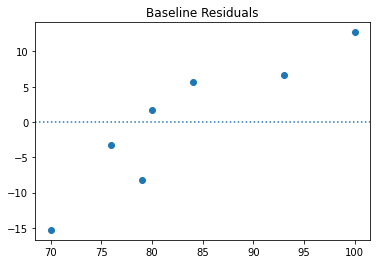

In [15]:
# plotting residual value itself 
    # the independednt variable (x)
    # the baseline (y)

plt.scatter(df.x, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals');

# your model has not captured the underlining trend
    # you can still improve the model 
        # by adding more independent variabls into it

***Presence of trends in residual plots indicate that there is an uncaptured linear trend, meaning we can still improve our model using independent features (in this case x).***

### MAE (Mean Absolute Error)

In [16]:
# average of absolute values of residuals
abs(df.residual).sum()

24.33769751693005

In [17]:
abs(df.baseline_residual).sum()

# My model is better than my baseline

53.71428571428571

### SSE (Sum of Squared Errors)

- sum the squared of residuals

In [18]:
# create 2 new columns onto df
df['residual^2'] = df.residual ** 2
df['baseline_residual^2'] =  df.baseline_residual ** 2

df

,x,y,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,100,96,83.285714,97.635214,-1.635214,12.714286,2.673926,161.653061
1,93,90,83.285714,91.676524,-1.676524,6.714286,2.810732,45.081633
2,84,89,83.285714,84.015350,4.984650,5.714286,24.846737,32.653061
3,80,85,83.285714,80.610384,4.389616,1.714286,19.268731,2.938776
4,76,80,83.285714,77.205418,2.794582,-3.285714,7.809691,10.795918
5,70,68,83.285714,72.097968,-4.097968,-15.285714,16.793345,233.653061
6,79,75,83.285714,79.759142,-4.759142,-8.285714,22.649435,68.653061


In [19]:
# add all of them
SSE = df['residual^2'].sum()
SSE_baseline =  df['baseline_residual^2'].sum()

In [20]:
print("SSE = ", SSE)
print("SSE Baseline = ", SSE_baseline)

SSE =  96.85259593679461
SSE Baseline =  555.4285714285714


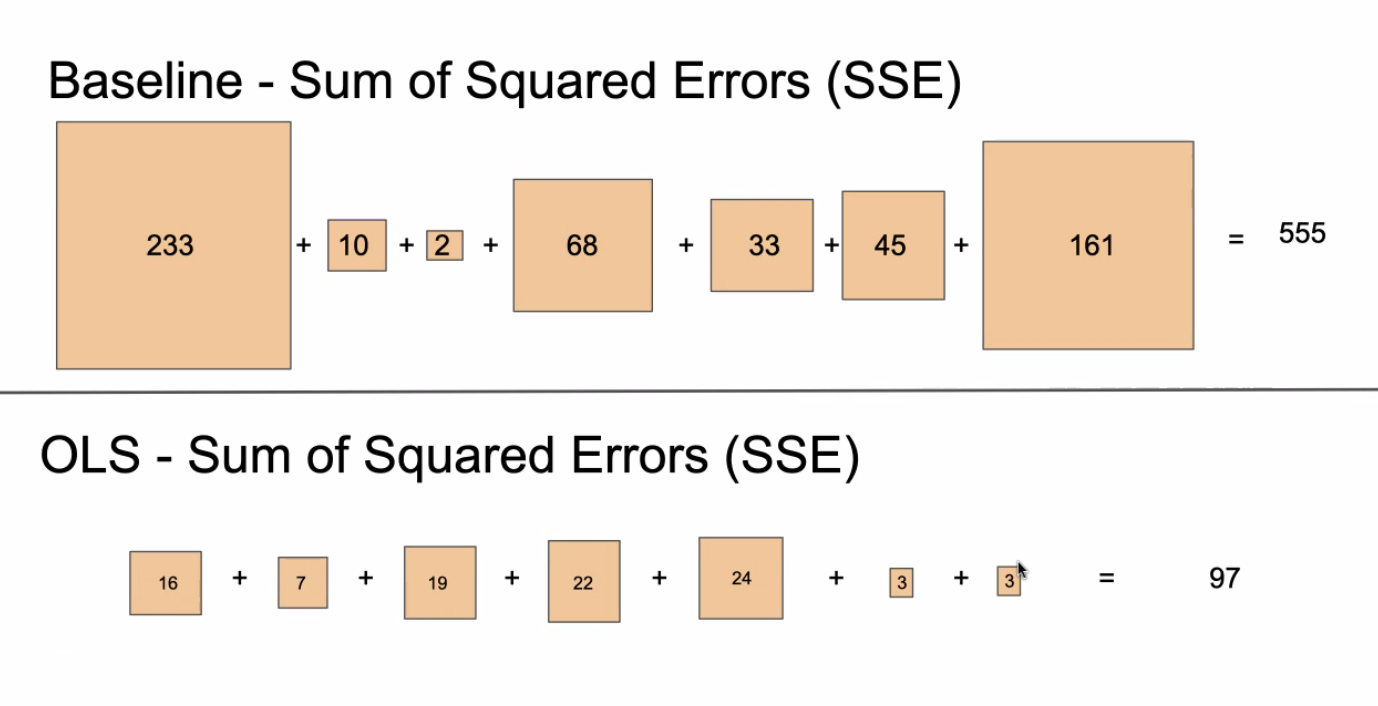

### In regression, the 'line of best fit' is one which minimizes the SSE

### MSE (Mean Squared Error)

- average of SSE = SSE/(no. of data points)

- the average of your errors that have each been squared

In [24]:
len(df)
df.shape

(7, 8)

In [27]:
MSE = SSE / len(df)
MSE_baseline = SSE_baseline / len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  13.836085133827803
MSE baseline =  79.34693877551021


### RMSE (Root Mean Squared Error)

- Square root of MSE
- Same units as the output (y) variable

In [28]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)
print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  3.7196888490608733
RMSE baseline =  8.907689867497083


### Metrics in Sklearn:
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


Start with MSE : (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

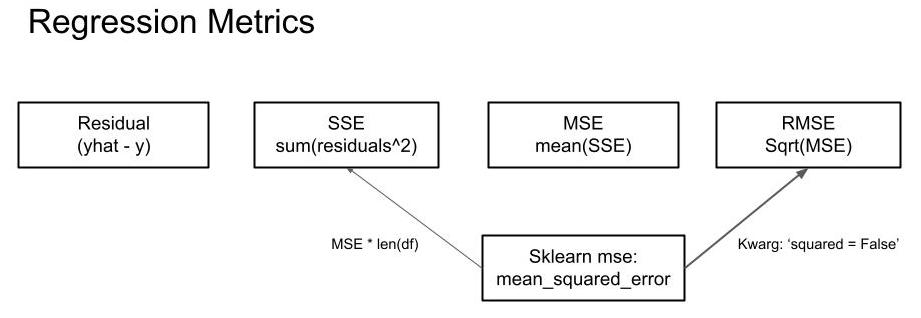

In [30]:
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(df.y, df.yhat)
MSE2_baseline = mean_squared_error(df.y, df.baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 13.836085133827803
MSE baseline 79.34693877551021


In [31]:
#calculate SSE

SSE2 = MSE2 * len(df)
SSE2_baseline = MSE2_baseline * len(df)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline) 

SSE 96.85259593679461
SSE baseline 555.4285714285714


In [34]:
#calculate RMSE: either take square root of MSE or use sklearn (kwarg 'squared = False')

RMSE2 = mean_squared_error(df.y, df.yhat, squared = False)
RMSE2_baseline = mean_squared_error(df.y, df.baseline, squared = False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 3.7196888490608733
RMSE baseline 8.907689867497083


In [35]:
# Mean Absolute Error:

from sklearn.metrics import mean_absolute_error

mean_absolute_error(df.y, df.yhat)

3.4768139309900072

### Metrics:

Most often used:

- RMSE 
    - Most commonly used 
    - Same units as the dependent variable. 
        - Average distance of each point from fitted regression line
        - measureing the distance between data point and regression line


- MAE 
    - Mean Absolute Error 
        - Linear in terms of risidual

*start with these for your project*

-------------------------------------------------------------
- SSE 
    - If outliers matter, you can use SSE 
    - Amplifies the effect of outliers

        - Residual 5 ----> SSE 25
        - Residual 10 ---> SSE 100
            - this tells me if you double the residual, the sse is quadruples
            - does not scale together



- MSE 
    - If outliers don't matter as much, but cost is non-linear




### How much of variance in target variable is explained by your independent variables?

 - $R^2$ - Coefficient of determination (0 to 1)
 - Compares the fit of the chosen model with that of a horizontal straight line (baseline)



**ESS** = Explained Sum of Square Error

**TSS** = Total Sum of Squared Error

$R^2$ = ESS/TSS

$R^2$ = 1 - SSE/TSS  (since ESS + SSE = TSS) 

Distance between the point (value) and mean value (baseline) is 'Total Error'  
Total Error = 'Explained Error' (accounted by for regression) + 'Unexplained Error'  

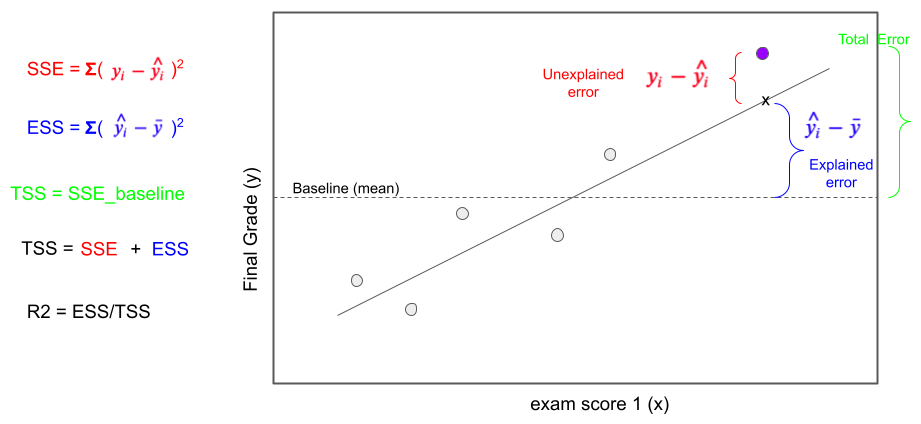

SSE = "*Unexplained Error*"

ESS = "*Explained Error*"

TSS = "*Total Error*"


- for the purple data point you start with your exam score one your prediction is where the x is, can be expliained by the regression line.
    - this error can be explained away by the regression model
        - can explain the error indicated byt he blue explained error area
    - We still do have unexplained error in this model
    - out of the max error we can have wahat portion is explained by the regression line?
        - out of the total error how much can be explained away by the regression model?
    _ higher the number the better your model is

In [36]:
# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline =   df['baseline_residual^2'].sum()
TSS

555.4285714285714

In [37]:
# Sum of squared error for the regression line (Unexplained error)
SSE = df['residual^2'].sum()
SSE

96.85259593679461

In [39]:
# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE
ESS

458.57597549177683

In [40]:
# Calculate R2
R2 = ESS/TSS
R2
# left with 17-18% error that I cant explain

0.8256254702784047

In [41]:
# in Statsmodel, look at model summary:
    
ols_model.summary()

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     23.67
Date:                Tue, 16 Mar 2021   Prob (F-statistic):            0.00461
Time:                        10:52:24   Log-Likelihood:                -19.128
No. Observations:                   7   AIC:                             42.26
Df Residuals:                       5   BIC:                             42.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5111     14.641      0.855      0.432     -25.124      50.146
x              0.8512      0.175      4.866      0.005       0.402       1.301
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.983
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.776
Skew:                           0.124   Prob(JB):                        0.678
Kurtosis:                       1.388   Cond. No.                         737.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Sklearn 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



### Can you trust value of $R^2$ i.e. is it statistically significant?
#### Is the model with n number of explanatory/independent variables any better than model with 0 explanatory variables?

 - ANOVA (F-test) - compares means of three or more groups
 - calculate p-value and compare to threshold ($\alpha$)



Null Hypothesis: $\beta_1$ = $\beta_2$ = $\beta_2$ .. = 0   
Alternate Hypothesis: $\beta_1$ != $\beta_2$ != $\beta_2$ .. != 0



- Use F statistics 
- Is p value less than $\alpha$ level (0.05)
- P value (0.0046) --> there is 0.46% probability that the improvements we are seeing with one independent variable (x) compared to baseline is due to random chance alone.
- In the model above p value 0.0046 is less than $\alpha$ (0.05). Hence the can reject the null hypothesis, meaning out model is better than the baseline

### Statistical and Practical Significance
Statistically significant $R^2$ = 0.9

Excellent!! The relationship between two variables explains 90% variation in the data



-----------------------
Statistically significant $R^2$ = 0.03

huh! Who cares if the relationship is significant if it only account for 3% variation in the data. Something else must be explaining the rest of 97% variation

$R^2$ can be useful for feature selection! (Next lesson)

### Confidence Intervals for model coefficients:
Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows:  
   - We are 95% confident that actual value of coefficient is between +/- 2 standard errors away from the estimated  values
    
